In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats


In [133]:
exams = pd.read_csv("exams.csv")

In [134]:
exams.head(10)

,Exam Subject,Score,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (White),Students (Black),Students (Hispanic/Latino),Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),All Students (2016)
0,ART HISTORY,5,897.00,1260.00,815.00,1889.00,1631.00,34,321.00,514.00,5,5,154.00,2704.00
1,ART HISTORY,4,1835.00,2608.00,1800.00,3787.00,3290.00,132,918.00,877.00,13,8,273.00,5587.00
2,ART HISTORY,3,2311.00,3282.00,2283.00,4657.00,3898.00,287,1347.00,992.00,19,10,307.00,6940.00
3,ART HISTORY,2,2252.00,3248.00,2374.00,4494.00,3211.00,450,1972.00,809.00,15,21,280.00,6868.00
4,ART HISTORY,1,901.00,1352.00,1072.00,1699.00,942.00,307,1074.00,292.00,13,10,87.00,2771.00
5,ART HISTORY,All,8196.00,11750.00,8344.00,16526.00,12972.00,1210,5632.00,3484.00,65,54,1101.00,24870.00
6,ART HISTORY,Average,2.95,2.93,2.87,2.98,3.11,2.29,2.55,3.15,2.72,2.57,3.12,2.94
7,BIOLOGY,5,5769.00,6396.00,8118.00,6776.00,8585.00,153,788.00,4443.00,11,7,733.00,14894.00
8,BIOLOGY,4,18585.00,21195.00,22244.00,25943.00,29999.00,976,3966.00,10367.00,75,49,2139.00,48187.00
9,BIOLOGY,3,30119.00,34631.00,30786.00,47150.00,46377.00,3305,10511.00,13051.00,183,97,3477.00,77936.00


In [137]:
exams.columns

Index(['Exam Subject', 'Score', 'Students (11th Grade)',
       'Students (12th Grade)', 'Students (Male)', 'Students (Female)',
       'Students (White)', 'Students (Black)', 'Students (Hispanic/Latino)',
       'Students (Asian)', 'Students (American Indian/Alaska Native)',
       'Students (Native Hawaiian/Pacific Islander)',
       'Students (Two or More Races)', 'All Students (2016)'],
      dtype='object')

In [138]:
exams.dtypes

Exam Subject                                    object
Score                                           object
Students (11th Grade)                          float64
Students (12th Grade)                          float64
Students (Male)                                float64
Students (Female)                              float64
Students (White)                               float64
Students (Black)                                object
Students (Hispanic/Latino)                     float64
Students (Asian)                               float64
Students (American Indian/Alaska Native)        object
Students (Native Hawaiian/Pacific Islander)     object
Students (Two or More Races)                   float64
All Students (2016)                            float64
dtype: object

In [185]:
exams["Students (Black)"] = pd.to_numeric(exams["Students (Black)"], errors="coerce")
exams["Students (American Indian/Alaska Native)"] = pd.to_numeric(exams["Students (American Indian/Alaska Native)"], errors="coerce")
exams["Students (Native Hawaiian/Pacific Islander)"] = pd.to_numeric(exams["Students (Native Hawaiian/Pacific Islander)"], errors="coerce")

In [186]:
exams.dtypes

Exam Subject                                    object
Score                                           object
Students (11th Grade)                          float64
Students (12th Grade)                          float64
Students (Male)                                float64
Students (Female)                              float64
Students (White)                               float64
Students (Black)                               float64
Students (Hispanic/Latino)                     float64
Students (Asian)                               float64
Students (American Indian/Alaska Native)       float64
Students (Native Hawaiian/Pacific Islander)    float64
Students (Two or More Races)                   float64
All Students (2016)                            float64
Percent Latino                                 float64
Percent Black                                  float64
Students (Hispanic/Latino) Fraction            float64
Students (Black) Fraction                      float64
Students (

In [187]:
exams["Exam Subject"].value_counts()

GOVERNMENT & POLITICS: U.S.           7
PHYSICS 1                             7
CHINESE LANGUAGE & CULTURE            7
LATIN                                 7
ITALIAN LANGUAGE & CULTURE            7
EUROPEAN HISTORY                      7
GOVERNMENT & POLITICS: COMPARATIVE    7
RESEARCH                              7
CALCULUS AB                           7
STUDIO ART: DRAWING                   7
HUMAN GEOGRAPHY                       7
COMPUTER SCIENCE A                    7
ENGLISH LANGUAGE & COMPOSITION        7
STUDIO ART: 3-D DESIGN                7
SPANISH LANGUAGE                      7
CHEMISTRY                             7
WORLD HISTORY                         7
PHYSICS C: ELECTRICITY & MAGNETISM    7
SPANISH LITERATURE                    7
PSYCHOLOGY                            7
ENVIRONMENTAL SCIENCE                 7
JAPANESE LANGUAGE & CULTURE           7
PHYSICS C: MECHANICS                  7
ART HISTORY                           7
U.S. HISTORY                          7


In [188]:
exams[exams["Exam Subject"] == "ENGLISH LITERATURE & COMPOSITION"]

exams["Students (Hispanic/Latino) Fraction"] = exams["Students (Hispanic/Latino)"] / exams["All Students (2016)"]
exams["Students (Black) Fraction"] = exams["Students (Black)"] / exams["All Students (2016)"]
exams["Students (Asian) Fraction"] = exams["Students (Asian)"] / exams["All Students (2016)"]
exams["Students (White) Fraction"] = exams["Students (White)"] / exams["All Students (2016)"]
exams["Students (Other) Fraction"] = (exams["Students (American Indian/Alaska Native)"] + exams["Students (Native Hawaiian/Pacific Islander)"] + exams["Students (Two or More Races)"]) / exams["All Students (2016)"]

In [191]:
exams.head()

,Exam Subject,Score,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (White),Students (Black),Students (Hispanic/Latino),Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),All Students (2016),Students (Hispanic/Latino) Fraction,Students (Black) Fraction,Students (Asian) Fraction,Students (White) Fraction,Students (Other) Fraction
0,ART HISTORY,5,897.0,1260.0,815.0,1889.0,1631.0,34.0,321.0,514.0,5.0,5.0,154.0,2704.0,0.118713,0.012574,0.190089,0.603180,0.060651
1,ART HISTORY,4,1835.0,2608.0,1800.0,3787.0,3290.0,132.0,918.0,877.0,13.0,8.0,273.0,5587.0,0.164310,0.023626,0.156972,0.588867,0.052622
2,ART HISTORY,3,2311.0,3282.0,2283.0,4657.0,3898.0,287.0,1347.0,992.0,19.0,10.0,307.0,6940.0,0.194092,0.041354,0.142939,0.561671,0.048415
3,ART HISTORY,2,2252.0,3248.0,2374.0,4494.0,3211.0,450.0,1972.0,809.0,15.0,21.0,280.0,6868.0,0.287129,0.065521,0.117793,0.467531,0.046010
4,ART HISTORY,1,901.0,1352.0,1072.0,1699.0,942.0,307.0,1074.0,292.0,13.0,10.0,87.0,2771.0,0.387586,0.110790,0.105377,0.339949,0.039697


In [192]:
ap_lit = exams[exams["Exam Subject"] == "ENGLISH LITERATURE & COMPOSITION"]

In [193]:
ap_lit.head(10)

,Exam Subject,Score,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (White),Students (Black),Students (Hispanic/Latino),Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),All Students (2016),Students (Hispanic/Latino) Fraction,Students (Black) Fraction,Students (Asian) Fraction,Students (White) Fraction,Students (Other) Fraction
70,ENGLISH LITERATURE & COMPOSITION,5,3428.00,25321.00,9723.0,19402.00,18906.00,516.0,2371.00,5476.0,33.00,22.00,1472.00,29125.00,0.081408,0.017717,0.188017,0.649133,0.052429
71,ENGLISH LITERATURE & COMPOSITION,4,8032.00,61378.00,25086.0,45300.00,46948.00,2063.0,7740.00,9692.0,120.00,61.00,3081.00,70386.00,0.109965,0.029310,0.137698,0.667008,0.046344
72,ENGLISH LITERATURE & COMPOSITION,3,14192.00,100653.00,43479.0,73374.00,73232.00,5882.0,18682.00,12405.0,276.00,169.00,4981.00,116853.00,0.159876,0.050337,0.106159,0.626702,0.046434
73,ENGLISH LITERATURE & COMPOSITION,2,18035.00,112113.00,49228.0,83999.00,63309.00,13838.0,36649.00,11391.0,602.00,301.00,5530.00,133227.00,0.275087,0.103868,0.085501,0.475196,0.048286
74,ENGLISH LITERATURE & COMPOSITION,1,4948.00,41789.00,20079.0,28035.00,11719.00,11697.0,19090.00,2638.0,298.00,126.00,1613.00,48114.00,0.396766,0.243110,0.054828,0.243567,0.042337
75,ENGLISH LITERATURE & COMPOSITION,All,48635.00,341254.00,147595.0,250110.00,214114.00,33996.0,84532.00,41602.0,1329.00,679.00,16677.00,397705.00,0.212550,0.085480,0.104605,0.538374,0.046982
76,ENGLISH LITERATURE & COMPOSITION,Average,2.73,2.75,2.7,2.78,2.99,2.0,2.26,3.1,2.24,2.34,2.84,2.75,0.821818,0.727273,1.127273,1.087273,2.698182


In [194]:
total = ap_lit[ap_lit["Score"] == "All"]

In [195]:
total

,Exam Subject,Score,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (White),Students (Black),Students (Hispanic/Latino),Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),All Students (2016),Students (Hispanic/Latino) Fraction,Students (Black) Fraction,Students (Asian) Fraction,Students (White) Fraction,Students (Other) Fraction
75,ENGLISH LITERATURE & COMPOSITION,All,48635.0,341254.0,147595.0,250110.0,214114.0,33996.0,84532.0,41602.0,1329.0,679.0,16677.0,397705.0,0.21255,0.08548,0.104605,0.538374,0.046982


In [197]:
ap_lit_transposed = ap_lit.T

In [198]:
ap_lit_transposed.head()

,70,71,72,73,74,75,76
Exam Subject,ENGLISH LITERATURE & COMPOSITION,ENGLISH LITERATURE & COMPOSITION,ENGLISH LITERATURE & COMPOSITION,ENGLISH LITERATURE & COMPOSITION,ENGLISH LITERATURE & COMPOSITION,ENGLISH LITERATURE & COMPOSITION,ENGLISH LITERATURE & COMPOSITION
Score,5,4,3,2,1,All,Average
Students (11th Grade),3428,8032,14192,18035,4948,48635,2.73
Students (12th Grade),25321,61378,100653,112113,41789,341254,2.75
Students (Male),9723,25086,43479,49228,20079,147595,2.7


In [202]:
ap_lit_transposed.columns = ["5", "4", "3", "2", "1", "All", "Average"]

In [205]:
ap_lit_transposed.head(20)

,5,4,3,2,1,All,Average
Exam Subject,ENGLISH LITERATURE & COMPOSITION,ENGLISH LITERATURE & COMPOSITION,ENGLISH LITERATURE & COMPOSITION,ENGLISH LITERATURE & COMPOSITION,ENGLISH LITERATURE & COMPOSITION,ENGLISH LITERATURE & COMPOSITION,ENGLISH LITERATURE & COMPOSITION
Score,5,4,3,2,1,All,Average
Students (11th Grade),3428,8032,14192,18035,4948,48635,2.73
Students (12th Grade),25321,61378,100653,112113,41789,341254,2.75
Students (Male),9723,25086,43479,49228,20079,147595,2.7
Students (Female),19402,45300,73374,83999,28035,250110,2.78
Students (White),18906,46948,73232,63309,11719,214114,2.99
Students (Black),516,2063,5882,13838,11697,33996,2
Students (Hispanic/Latino),2371,7740,18682,36649,19090,84532,2.26
Students (Asian),5476,9692,12405,11391,2638,41602,3.1


In [209]:
ap_lit_transposed.index

Index(['Exam Subject', 'Score', 'Students (11th Grade)',
       'Students (12th Grade)', 'Students (Male)', 'Students (Female)',
       'Students (White)', 'Students (Black)', 'Students (Hispanic/Latino)',
       'Students (Asian)', 'Students (American Indian/Alaska Native)',
       'Students (Native Hawaiian/Pacific Islander)',
       'Students (Two or More Races)', 'All Students (2016)',
       'Students (Hispanic/Latino) Fraction', 'Students (Black) Fraction',
       'Students (Asian) Fraction', 'Students (White) Fraction',
       'Students (Other) Fraction'],
      dtype='object')

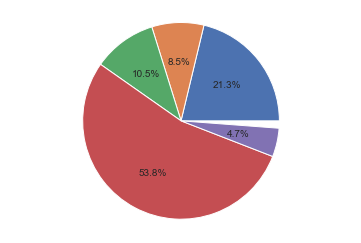

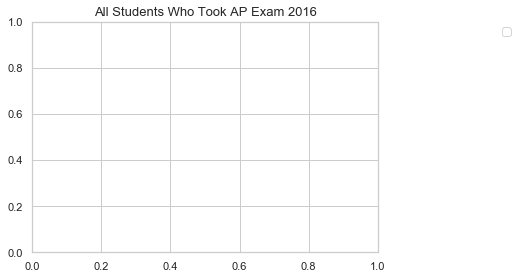

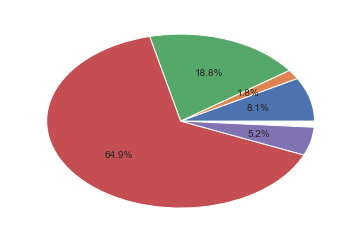

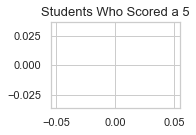

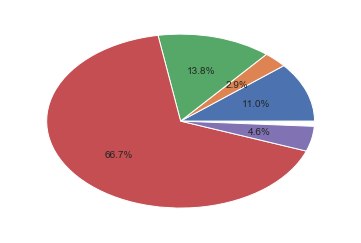

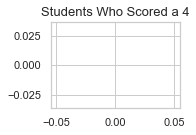

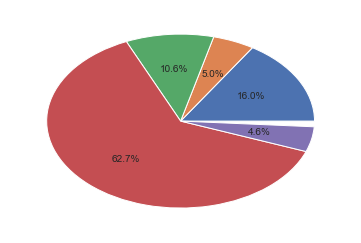

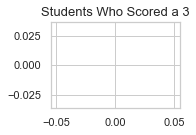

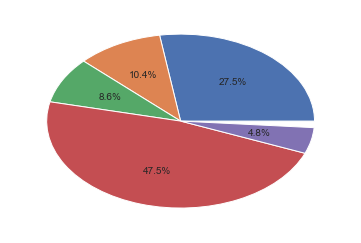

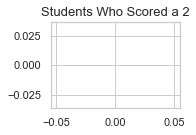

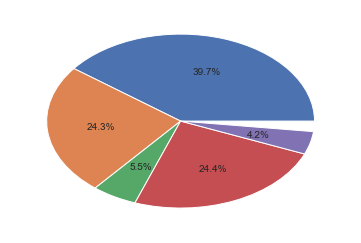

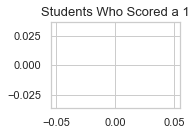

In [226]:
#plt.figure(figsize=(10,5))
plt.pie(ap_lit_transposed.iloc[-5:, 5], autopct="%1.1f%%")
plt.axis("equal")
plt.figure().add_axes([.1, .1, .8, .8])
plt.title("All Students Who Took AP Exam 2016", fontsize = 13)
plt.legend(ap_lit_transposed.index[-5:], loc = "upper right", bbox_to_anchor=(.9, 0, .5, 1))
plt.show()

#plt.figure(figsize=(10,5))
plt.pie(ap_lit_transposed.iloc[-5:, 0], autopct="%1.1f%%")
plt.figure().add_axes([.65, .65, .3, .3])
plt.axis("equal")
plt.title("Students Who Scored a 5", fontsize = 13)
plt.show()


#plt.figure(figsize=(10,5))
plt.pie(ap_lit_transposed.iloc[-5:, 1], autopct="%1.1f%%")
plt.figure().add_axes([.65, .65, .3, .3])
plt.axis("equal")
plt.title("Students Who Scored a 4", fontsize = 13)
plt.show()

#plt.figure(figsize=(10,5))
plt.pie(ap_lit_transposed.iloc[-5:, 2], autopct="%1.1f%%")
plt.figure().add_axes([.65, .65, .3, .3])
plt.axis("equal")
plt.title("Students Who Scored a 3", fontsize = 13)
plt.show()

#plt.figure(figsize=(10,5))
plt.pie(ap_lit_transposed.iloc[-5:, 3], autopct="%1.1f%%")
plt.figure().add_axes([.65, .65, .3, .3])
plt.axis("equal")
plt.title("Students Who Scored a 2", fontsize = 13)
plt.show()

#plt.figure(figsize=(10,5))
plt.pie(ap_lit_transposed.iloc[-5:, 4], autopct="%1.1f%%")
plt.figure().add_axes([.65, .65, .3, .3])
plt.axis("equal")
plt.title("Students Who Scored a 1", fontsize = 13)
plt.show()




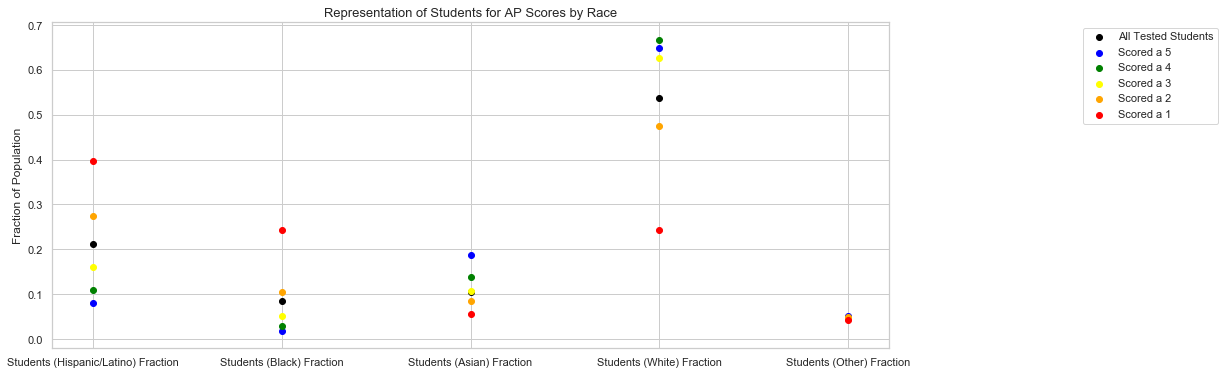

In [258]:
from matplotlib.ticker import FormatStrFormatter


#plt.xticks(rotation=70)
plt.figure(figsize=(15,6))
plt.scatter(y=ap_lit_transposed.iloc[-5:, 5], x=ap_lit_transposed.index[-5:], color = "black", label = "All Tested Students")
plt.scatter(y=ap_lit_transposed.iloc[-5:, 0], x=ap_lit_transposed.index[-5:], color = "blue", label = "Scored a 5")
plt.scatter(y=ap_lit_transposed.iloc[-5:, 1], x=ap_lit_transposed.index[-5:], color = "green", label = "Scored a 4")
plt.scatter(y=ap_lit_transposed.iloc[-5:, 2], x=ap_lit_transposed.index[-5:], color = "yellow", label = "Scored a 3")
plt.scatter(y=ap_lit_transposed.iloc[-5:, 3], x=ap_lit_transposed.index[-5:], color = "orange", label = "Scored a 2")
plt.scatter(y=ap_lit_transposed.iloc[-5:, 4], x=ap_lit_transposed.index[-5:], color = "red", label = "Scored a 1")
plt.ylabel("Fraction of Population")
plt.title("Representation of Students for AP Scores by Race", fontsize=13)



plt.legend(loc="upper right", bbox_to_anchor=(.9, 0, .5, 1))
plt.show()



#sns.set(style="whitegrid")
#sns.lmplot(y=ap_lit_transposed.iloc[-5:, 5], x=ap_lit_transposed.index[-5:], data=ap_lit_transposed)
#plt.xlabel("Price Per Square Foot in July 2018")
#plt.title("Plot 1: Scatter Plot of SizeRank and July 2018 Price Per Square Foot", fontsize=13)

In [219]:
ap_authors = pd.read_csv("AP Authors.csv", encoding = "ISO-8859-1")

In [251]:
ap_authors.head()

,Title,Author,Genre,Date,Ethnicity
0,Medea,Euripides,play,431 BC,Greek
1,The Odyssey,Homer,epic poem,(no date),Greek
2,Antigone,Sophocles,play,441 BC,Greek
3,Oedipus Rex,Sophocles,play,429 BC,Greek
4,Don Quixote,Miguel de Cervantes,novel,1605,Spanish


In [252]:
ap_authors["Ethnicity"].value_counts()

American            45
English             31
African-American    14
Asian-American       6
Greek                4
Native American      3
French               3
Irish                3
Russian              3
Afghan-American      2
South African        2
Canadian             2
Mexican-American     2
Indian               1
Spanish              1
Nigerian             1
Norwegian            1
Asian-Canadian       1
Japanese-English     1
Polish-English       1
Name: Ethnicity, dtype: int64

In [254]:
def WOC(c):
    if ("African American" in str(c["Ethnicity"])) or ("Asian-American" in str(c["Ethnicity"])) or ("Native American" in str(c["Ethnicity"])) or ("Afghan-American" in str(c["Ethnicity"])) or ("Mexican-American" in str(c["Ethnicity"])) or ("Indian" in str(c["Ethnicity"])) or ("Spanish" in str(c["Ethnicity"])) or ("Nigerian" in str(c["Ethnicity"])) or ("Asian-Canadian" in str(c["Ethnicity"])) or ("Japanese-English" in str(c["Ethnicity"])):
        return 1
    else:
        return 0
    
ap_authors["Writer of Color"] = ap_authors.apply(WOC, axis=1)

In [255]:
ap_authors.head()

,Title,Author,Genre,Date,Ethnicity,Writer of Color
0,Medea,Euripides,play,431 BC,Greek,0
1,The Odyssey,Homer,epic poem,(no date),Greek,0
2,Antigone,Sophocles,play,441 BC,Greek,0
3,Oedipus Rex,Sophocles,play,429 BC,Greek,0
4,Don Quixote,Miguel de Cervantes,novel,1605,Spanish,1


In [256]:
ap_authors["Writer of Color"].value_counts()

0    109
1     18
Name: Writer of Color, dtype: int64

TypeError: 'int' object is not callable

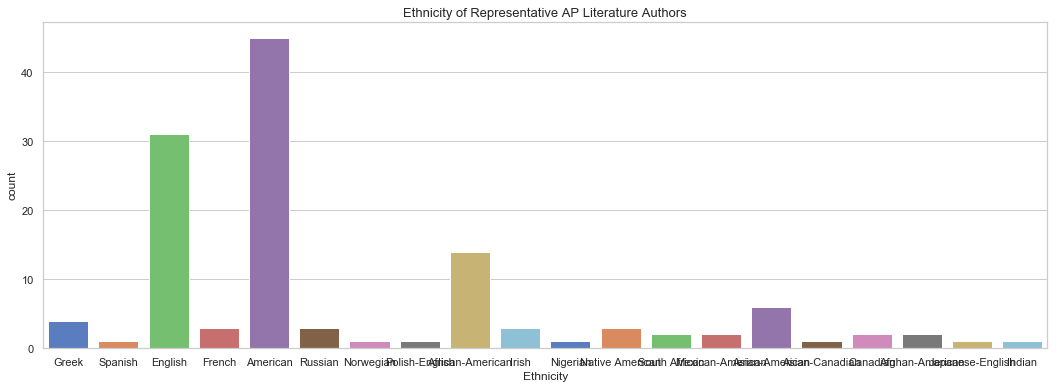

In [265]:
plt.figure(figsize=(18,6))
sns.countplot(x="Ethnicity", data=ap_authors, palette="muted")
plt.title("Ethnicity of Representative AP Literature Authors", fontsize=13)
plt.xticks(rotation=70)

In [268]:
print("Out of the authors typically represented on the AP English Literature and Composition exam,", 
      (ap_authors["Writer of Color"].mean())*100, "of them are writers of color.")

Out of the authors typically represented on the AP English Literature and Composition exam, 14.173228346456693 of them are writers of color.


Currently, Black and Latino students are performing poorly on the AP English Literature and Composition test. They are significantly underrepresented in the population that scores a 3, 4, or 5 on the test and significantly overrepresented in the population that scores a 1 or a 2. Typically, only students who score a 3 and higher on the test will earn college credit. My hypothesis is that Black and Latino students would perform better on this particular exam if the authors included on the test were more often writers of color (as opposed to white writers, typically of European descent). 